# Lyft Analytics Assignment

## The goal is to recommend a Driver’s Lifetime Value.

# Table of Content
## Part 1. Load the Data, overview of three tables
## Part 2.  Join dataframes
## Part 3. Exploratory Data Analysis
## Part 4. Modelling

In [137]:
import sys
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta
import math
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')

## Part 1. Load the Data, overview of three tables

In [138]:
drivers = pd.read_csv('driver_ids.csv')
rides_id = pd.read_csv('ride_ids.csv')
rides_times = pd.read_csv('ride_timestamps.csv')

## driver_ids.csv has 
- driver_id:                      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Unique identifier for a driver
- driver_onboard_date:           &nbsp;&nbsp;&nbsp; Data on which driver was on_board

#### insights - 1. 937 drivers have an onboard date
#### 2. There is no missing values, so we don't need to deal with missing values.However driver_onboard_date is not as a datetime format, therefore we need to convert it into a datetime format.
#### 3. The driver onboard date varies between: '2016-03-28 00:00:00' and '2016-05-15 00:00:00'

Take a look at driver_ids.csv

In [139]:
drivers.head(10)

,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29 00:00:00
1,007f0389f9c7b03ef97098422f902e62,2016-03-29 00:00:00
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05 00:00:00
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23 00:00:00
4,01674381af7edd264113d4e6ed55ecda,2016-04-29 00:00:00
5,01788cf817698fe68eaecd7eb18b2f72,2016-05-06 00:00:00
6,0213f8b59219e32142711992ca4ec01f,2016-04-07 00:00:00
7,021e5cd15ef0bb3ec20a12af99e142b3,2016-05-07 00:00:00
8,0258e250ca195cc6258cbdc75aecd853,2016-04-26 00:00:00
9,028b5a4dcd7f4924ebfabcf2e814c014,2016-05-06 00:00:00


In [140]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 2 columns):
driver_id              937 non-null object
driver_onboard_date    937 non-null object
dtypes: object(2)
memory usage: 14.7+ KB


In [141]:
drivers['driver_onboard_date']=pd.to_datetime(drivers['driver_onboard_date'])

In [142]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 2 columns):
driver_id              937 non-null object
driver_onboard_date    937 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 14.7+ KB


In [143]:
drivers.head()

,driver_id,driver_onboard_date
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29
1,007f0389f9c7b03ef97098422f902e62,2016-03-29
2,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05
3,0152a2f305e71d26cc964f8d4411add9,2016-04-23
4,01674381af7edd264113d4e6ed55ecda,2016-04-29


In [144]:
drivers["driver_onboard_date"].max()

Timestamp('2016-05-15 00:00:00')

In [145]:
drivers["driver_onboard_date"].min()

Timestamp('2016-03-28 00:00:00')

## rides_id.csv has
- driver_id  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Unique identifier for a driver
- ride_id &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Unique identifier for a ride that was completed by the driver
- ride_distance &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ride distance in meters
- ride_duration &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Ride durations in seconds
- ride_prime_time &nbsp; PrimeTime applied on the ride

#### Insights - 1.There is no  missing values 
#### 2. There are 193,502 trips in total.

In [146]:
rides_id.head(10)

,driver_id,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,006d61cf7446e682f7bc50b0f8a5bea5,1811,327,50
1,002be0ffdc997bd5c50703158b7c2491,01b522c5c3a756fbdb12e95e87507eda,3362,809,0
2,002be0ffdc997bd5c50703158b7c2491,029227c4c2971ce69ff2274dc798ef43,3282,572,0
3,002be0ffdc997bd5c50703158b7c2491,034e861343a63ac3c18a9ceb1ce0ac69,65283,3338,25
4,002be0ffdc997bd5c50703158b7c2491,034f2e614a2f9fc7f1c2f77647d1b981,4115,823,100
5,002be0ffdc997bd5c50703158b7c2491,03d6b9d80b8a96135cb9b25178e9e203,4832,917,100
6,002be0ffdc997bd5c50703158b7c2491,04053c0ed21761e07f0b869cab5b7dd0,1575,347,0
7,002be0ffdc997bd5c50703158b7c2491,0534d432e0186625f623aaee57af98be,3056,687,25
8,002be0ffdc997bd5c50703158b7c2491,053a1621c0affcd2b9c517af5c2bc843,3940,1143,75
9,002be0ffdc997bd5c50703158b7c2491,066e92c52f59486de56cd7b8716a4ca6,3957,868,50


In [147]:
rides_id.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193502 entries, 0 to 193501
Data columns (total 5 columns):
driver_id          193502 non-null object
ride_id            193502 non-null object
ride_distance      193502 non-null int64
ride_duration      193502 non-null int64
ride_prime_time    193502 non-null int64
dtypes: int64(3), object(2)
memory usage: 7.4+ MB


## ride_timestamps.csv has 
- ride_id  Unique identifier for a ride
- event  event describes the type of event (see below)
- timestamp  Time of event


#### Insights -
#### 1. There are 970405 events in this dataset, each one has 5 event actions - requested at, accepted at, arrived at, picked up at, and dropped off at.
#### 2.  The ride time range varies between: '2016-03-28 05:48:18' and '2016-06-27 00:50:50'
#### 3. There is one missing value at arrived_at for ride_id 72f0fa0bd86800e9da5c4dced32c8735. I will remove it.

In [148]:
rides_times.head()

,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51
2,00003037a262d9ee40e61b5c0718f7f0,arrived_at,2016-06-13 09:44:31
3,00003037a262d9ee40e61b5c0718f7f0,picked_up_at,2016-06-13 09:44:33
4,00003037a262d9ee40e61b5c0718f7f0,dropped_off_at,2016-06-13 10:03:05


In [149]:
rides_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970405 entries, 0 to 970404
Data columns (total 3 columns):
ride_id      970405 non-null object
event        970405 non-null object
timestamp    970404 non-null object
dtypes: object(3)
memory usage: 22.2+ MB


In [150]:
#convert into datetime format
#rides_times["timestamp"]=pd.to_datetime(rides_times["timestamp"])


In [151]:
#reshape the dataframe, so it is easier to read
#rides_times = rides_times.pivot(index='ride_id', columns='event', values='timestamp')

In [152]:
rides_times.head(2)

,ride_id,event,timestamp
0,00003037a262d9ee40e61b5c0718f7f0,requested_at,2016-06-13 09:39:19
1,00003037a262d9ee40e61b5c0718f7f0,accepted_at,2016-06-13 09:39:51


In [153]:
null_column=rides_times.columns[rides_times.isnull().any()]

In [154]:
null_column

Index(['timestamp'], dtype='object')

In [155]:
print(rides_times[rides_times["timestamp"].isnull()][null_column])

       timestamp
434222       NaN


In [156]:
rides_times.drop(rides_times.index[[434220,434221,434222,434223,434224]],inplace=True)

To avoid seasonality effect, we will consider 3 periods of 28 days

In [157]:
rides_times['timestamp'].min()

'2016-03-28 05:48:18'

In [158]:
rides_times['timestamp'].max()

'2016-06-27 00:50:50'

## part 2. Join dataframes

#### Insights
#### 1. 83 drivers joined LYFT (have an onboard date) but didn't complete any ride. Removed them because on board time are crucial for each driver, and removing 8% of the drivers should not impact the distribution of the number of rides per driver.


In [159]:
#outer join
combined_df_driver_id_ride_id = pd.merge(drivers,rides_id,how='outer',on='driver_id')

In [160]:
combined_df_driver_id_ride_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193585 entries, 0 to 193584
Data columns (total 6 columns):
driver_id              193585 non-null object
driver_onboard_date    185974 non-null datetime64[ns]
ride_id                193502 non-null object
ride_distance          193502 non-null float64
ride_duration          193502 non-null float64
ride_prime_time        193502 non-null float64
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 10.3+ MB


In [161]:
# When joining the driver_id to the ride_id table the number of unique drivers increased to 1,020
combined_df_driver_id_ride_id['driver_id'].nunique()

1020

In [162]:
combined_df_driver_id_ride_id[combined_df_driver_id_ride_id['driver_onboard_date'].isnull()]['driver_id'].nunique()

83

In [163]:
combined_df_driver_id_ride_id[combined_df_driver_id_ride_id['ride_id'].isnull()]['driver_id'].nunique()

83

In [164]:
combined_df_driver_id_ride_id.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193585 entries, 0 to 193584
Data columns (total 6 columns):
driver_id              193585 non-null object
driver_onboard_date    185974 non-null datetime64[ns]
ride_id                193502 non-null object
ride_distance          193502 non-null float64
ride_duration          193502 non-null float64
ride_prime_time        193502 non-null float64
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 10.3+ MB


In [165]:
combined_df_driver_id_ride_id.head()

,driver_id,driver_onboard_date,ride_id,ride_distance,ride_duration,ride_prime_time
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811.0,327.0,50.0
1,002be0ffdc997bd5c50703158b7c2491,2016-03-29,01b522c5c3a756fbdb12e95e87507eda,3362.0,809.0,0.0
2,002be0ffdc997bd5c50703158b7c2491,2016-03-29,029227c4c2971ce69ff2274dc798ef43,3282.0,572.0,0.0
3,002be0ffdc997bd5c50703158b7c2491,2016-03-29,034e861343a63ac3c18a9ceb1ce0ac69,65283.0,3338.0,25.0
4,002be0ffdc997bd5c50703158b7c2491,2016-03-29,034f2e614a2f9fc7f1c2f77647d1b981,4115.0,823.0,100.0


## Join the Combined Driver_id/Ride_id table to the Ride_timestamp

#### Insights
#### 1683 rides (0.8%) don't have an associated timestamp are being removed

In [166]:
combined_all = pd.merge(combined_df_driver_id_ride_id,rides_times,how='outer',on='ride_id')

In [167]:
combined_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 979167 entries, 0 to 979166
Data columns (total 8 columns):
driver_id              932857 non-null object
driver_onboard_date    922806 non-null datetime64[ns]
ride_id                979084 non-null object
ride_distance          932774 non-null float64
ride_duration          932774 non-null float64
ride_prime_time        932774 non-null float64
event                  970400 non-null object
timestamp              970400 non-null object
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 67.2+ MB


In [168]:
#the number of unique rides is higher than the one obtained with the Ride_id table 194,080
combined_all['ride_id'].nunique()

202764

In [169]:
#The existing rides with no associated timestamp (1683 represents 0.8%) have to be removed
# However,the drivers that didn't complete any rides are kept in the dataframe
combined_all[combined_all['timestamp'].isnull() & 
                                             combined_all['ride_id'].notnull()]['ride_id'].nunique()

8684

In [170]:
combined_all= combined_all[((combined_all['ride_id'].isnull()) 
                & (combined_all['timestamp'].isnull())) | 
                (( combined_all['ride_id'].notnull()) & 
                (combined_all['timestamp'].notnull()))]

In [171]:
combined_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 970483 entries, 0 to 979166
Data columns (total 8 columns):
driver_id              924173 non-null object
driver_onboard_date    921123 non-null datetime64[ns]
ride_id                970400 non-null object
ride_distance          924090 non-null float64
ride_duration          924090 non-null float64
ride_prime_time        924090 non-null float64
event                  970400 non-null object
timestamp              970400 non-null object
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 66.6+ MB


# -------------------------------------------------------------------------

From the 
Ride rates

Using the following assumption on ride costs 

Base Fare - \$2.00
Cost per Mile - \$1.15
Cost per Minute - \$0.22
Service Fee - \$1.75
Minimum Fare - \$5.00
Maximum Fare - \$400.00

Therefore, we need to do the unit conversions.

#### Conversion:
#### ride_distance ---> meter to mile
#### ride_duration ---> second to minute

In [172]:
combined_all['ride_duration_minutes']=combined_all['ride_duration'].map(lambda x: int(x/60) if not math.isnan(x) else x )
combined_all['ride_distance_miles']=combined_all['ride_distance']*0.000621371
combined_all.head()

,driver_id,driver_onboard_date,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp,ride_duration_minutes,ride_distance_miles
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811.0,327.0,50.0,requested_at,2016-04-23 02:13:50,5.0,1.125303
1,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811.0,327.0,50.0,accepted_at,2016-04-23 02:14:15,5.0,1.125303
2,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811.0,327.0,50.0,arrived_at,2016-04-23 02:16:36,5.0,1.125303
3,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811.0,327.0,50.0,picked_up_at,2016-04-23 02:16:40,5.0,1.125303
4,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811.0,327.0,50.0,dropped_off_at,2016-04-23 02:22:07,5.0,1.125303


In [173]:

# Function to compute the ride price

def compute_ride_price(distance_miles, duration_minute, prime):
    price = 2+1.75+distance_miles*1.15+duration_minute*0.22
    price = price *((100+prime)/100.0)
    price.loc[price>400]=400
    price.loc[price<5]=5
    return price

In [174]:
combined_all['total_revenue_$'] = compute_ride_price(
                                                    combined_all['ride_distance_miles'], 
                                                    combined_all['ride_duration_minutes'], 
                                                    combined_all['ride_prime_time']
                                                                                    )
combined_all.head()


,driver_id,driver_onboard_date,ride_id,ride_distance,ride_duration,ride_prime_time,event,timestamp,ride_duration_minutes,ride_distance_miles,total_revenue_$
0,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811.0,327.0,50.0,requested_at,2016-04-23 02:13:50,5.0,1.125303,9.216147
1,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811.0,327.0,50.0,accepted_at,2016-04-23 02:14:15,5.0,1.125303,9.216147
2,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811.0,327.0,50.0,arrived_at,2016-04-23 02:16:36,5.0,1.125303,9.216147
3,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811.0,327.0,50.0,picked_up_at,2016-04-23 02:16:40,5.0,1.125303,9.216147
4,002be0ffdc997bd5c50703158b7c2491,2016-03-29,006d61cf7446e682f7bc50b0f8a5bea5,1811.0,327.0,50.0,dropped_off_at,2016-04-23 02:22:07,5.0,1.125303,9.216147


In [175]:
# Rides only contain information per ride_id 
#It contains 83 drivers that didn't complete any rides
rides = combined_all.groupby('ride_id', as_index=False).agg({
                                                                    'driver_id': lambda x : x.iloc[0],
                                                                    'driver_onboard_date': lambda x: x.iloc[0],
                                                                    'ride_distance': lambda x: x.iloc[0],
                                                                    'ride_duration' : lambda x: x.iloc[0],
                                                                    'ride_prime_time': lambda x: x.iloc[0],
                                                                    'timestamp': lambda x: x.iloc[0],
                                                                    'ride_duration_minutes': lambda x: x.iloc[0],
                                                                    'ride_distance_miles': lambda x: x.iloc[0],
                                                                    'total_revenue_$': lambda x: x.iloc[0],  
                                                                    })

In [176]:
rides.head()

,ride_id,driver_id,driver_onboard_date,ride_distance,ride_duration,ride_prime_time,timestamp,ride_duration_minutes,ride_distance_miles,total_revenue_$
0,00003037a262d9ee40e61b5c0718f7f0,d967f5296732fa55266b5f1314e7447b,2016-04-09,3698.0,1112.0,0.0,2016-06-13 09:39:19,18.0,2.297830,10.352504
1,00005eae40882760d675da5effb89ae3,0656192a402808805282e60761bda088,2016-04-30,3016.0,479.0,25.0,2016-05-14 05:23:21,7.0,1.874055,9.306454
2,000061d42cf29f73b591041d9a1b2973,c468a648519cd42da75e6aa9dadf733e,2016-04-01,4084.0,406.0,75.0,2016-05-16 15:43:09,6.0,2.537679,13.979579
3,00006efeb0d5e3ccad7d921ddeee9900,689bdf87fb2de49f98bf4946cfaa5068,2016-04-04,1646.0,332.0,75.0,2016-05-11 19:29:36,5.0,1.022777,10.545838
4,0000d9b24d8ccdd991b76258e616fa01,NaN,NaT,NaN,NaN,NaN,2016-04-26 18:11:38,NaN,NaN,NaN


In [177]:
## Drivers contain information per driver
# drivers doesn t contain the 83 drivers because it 
drivers = rides.groupby('driver_id', as_index=False).agg({
                                            'ride_id': lambda x: x.count(),
                                            'driver_onboard_date': lambda x: pd.to_datetime(x.iloc[0]),
                                            'timestamp': lambda x: pd.to_datetime(x.max()),
                                            'total_revenue_$': lambda x: x.sum(),
                                            'ride_distance_miles': lambda x: x.sum(),
                                            'ride_duration': lambda x: x.sum(),
                                            }).rename(columns={
                                                                'ride_id': '#_rides',
                                                                'timestamp': 'last_date',
                                                                'ride_distance_miles': 'total_distance_miles',
                                                                'ride_duration':'total_duration_seconds'          
                                                })
drivers.head()

,driver_id,#_rides,driver_onboard_date,last_date,total_revenue_$,total_distance_miles,total_duration_seconds
0,002be0ffdc997bd5c50703158b7c2491,277,2016-03-29,2016-06-23 10:06:26,3618.368651,1081.363873,221238.0
1,007f0389f9c7b03ef97098422f902e62,31,2016-03-29,2016-06-22 13:17:40,328.347501,73.030355,20497.0
2,011e5c5dfc5c2c92501b8b24d47509bc,34,2016-04-05,2016-06-12 20:22:22,489.169288,167.554554,29205.0
3,0152a2f305e71d26cc964f8d4411add9,191,2016-04-23,2016-06-26 10:16:37,2622.200548,914.185249,174521.0
4,01674381af7edd264113d4e6ed55ecda,375,2016-04-29,2016-06-24 13:03:37,5418.915437,1940.941796,357443.0


In [178]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 843
Data columns (total 7 columns):
driver_id                 844 non-null object
#_rides                   844 non-null int64
driver_onboard_date       837 non-null datetime64[ns]
last_date                 844 non-null datetime64[ns]
total_revenue_$           844 non-null float64
total_distance_miles      844 non-null float64
total_duration_seconds    844 non-null float64
dtypes: datetime64[ns](2), float64(3), int64(1), object(1)
memory usage: 52.8+ KB


In [179]:
# Those are the drivers who joined Lyft but never completed a ride
inexistant_rides = combined_all.loc[combined_all['ride_id'].isnull()]
never_activated_drivers = inexistant_rides.groupby('driver_id', as_index=False).agg({
                                                            'ride_id': lambda x: x.count(),
                                                            'driver_onboard_date': lambda x: pd.to_datetime(x.iloc[0]),
                                                            'total_revenue_$': lambda x: 0,
                                                            'ride_distance_miles': lambda x: 0,
                                                            'ride_duration': lambda x: 0,
                                            }).rename(columns={
                                                                'ride_id': '#_rides',
                                                                'ride_distance_miles': 'total_distance_miles',
                                                                'ride_duration':'total_duration_seconds'          
                                                })

never_activated_drivers['last_date']=never_activated_drivers['driver_onboard_date']

In [180]:
#add those never activated drivers to drivers dataset
drivers = pd.concat([drivers, never_activated_drivers])

In [181]:
drivers['total_#_days']=(drivers['last_date']-drivers['driver_onboard_date']+timedelta(days=1)).dt.days
drivers['rides_per_day'] =drivers['#_rides']/drivers['total_#_days']
drivers['rides_per_day'].loc[drivers['rides_per_day'].isnull()]=0

In [182]:
drivers.head()

,#_rides,driver_id,driver_onboard_date,last_date,total_distance_miles,total_duration_seconds,total_revenue_$,total_#_days,rides_per_day
0,277,002be0ffdc997bd5c50703158b7c2491,2016-03-29,2016-06-23 10:06:26,1081.363873,221238.0,3618.368651,87.0,3.183908
1,31,007f0389f9c7b03ef97098422f902e62,2016-03-29,2016-06-22 13:17:40,73.030355,20497.0,328.347501,86.0,0.360465
2,34,011e5c5dfc5c2c92501b8b24d47509bc,2016-04-05,2016-06-12 20:22:22,167.554554,29205.0,489.169288,69.0,0.492754
3,191,0152a2f305e71d26cc964f8d4411add9,2016-04-23,2016-06-26 10:16:37,914.185249,174521.0,2622.200548,65.0,2.938462
4,375,01674381af7edd264113d4e6ed55ecda,2016-04-29,2016-06-24 13:03:37,1940.941796,357443.0,5418.915437,57.0,6.578947


In [183]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 927 entries, 0 to 82
Data columns (total 9 columns):
#_rides                   927 non-null int64
driver_id                 927 non-null object
driver_onboard_date       920 non-null datetime64[ns]
last_date                 927 non-null datetime64[ns]
total_distance_miles      927 non-null float64
total_duration_seconds    927 non-null float64
total_revenue_$           927 non-null float64
total_#_days              920 non-null float64
rides_per_day             927 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(1), object(1)
memory usage: 72.4+ KB


# Part 3 - EDA!

#### Insights
#### 1.The driver behavior varies SIGNIFICANTLY across drivers, they don't act alike

In [184]:
drivers.describe()

,#_rides,total_distance_miles,total_duration_seconds,total_revenue_$,total_#_days,rides_per_day
count,927.000000,927.000000,927.000000,927.000000,920.000000,927.000000
mean,199.372168,859.940847,171399.894283,2734.397058,51.106522,3.474992
std,180.870521,793.237956,156255.371603,2488.067272,26.047365,2.866441
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,39.000000,162.546304,32730.500000,519.490216,34.000000,0.954451
50%,203.000000,766.887389,169015.000000,2647.977744,56.000000,3.148148
75%,317.000000,1358.658760,270937.000000,4332.596786,72.000000,5.264481
max,919.000000,4118.571884,779797.000000,12525.436478,91.000000,17.500000


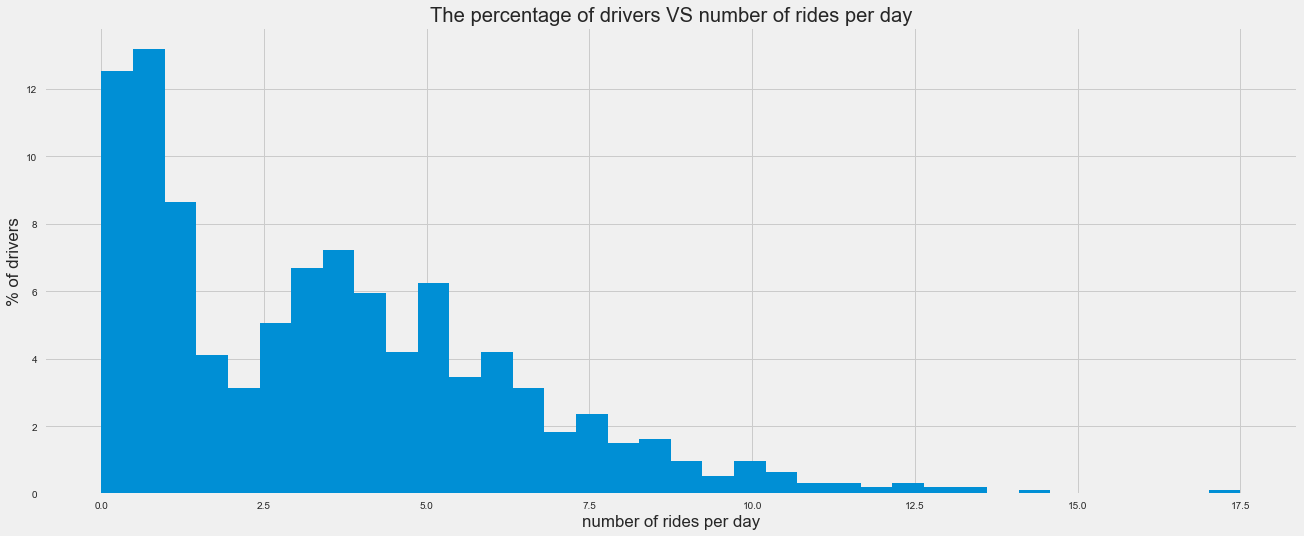

In [185]:
ndrivers = len(drivers['driver_id'])
drivers.hist(column='rides_per_day', bins=36, figsize=(20,8), weights=np.ones(ndrivers)*100.0/ndrivers)
plt.xlabel("number of rides per day")
plt.ylabel("% of drivers")
plt.title("The percentage of drivers VS number of rides per day")
plt.savefig('#_rides_day.png')
plt.show()

In [186]:
# Here, we need at least 2 periods of 28 days to correlate churn with revenue in the first 28 days
# Churners are the drivers who didn t complete any ride during 28 days

rides_at_least_56_days_data = rides[pd.to_datetime(rides['driver_onboard_date']) <= 
                                    pd.to_datetime('2016-05-02 00:00:00') ]

In [187]:
# first 28 periods rides data

rides_first_28_period = rides_at_least_56_days_data[(pd.to_datetime(rides_at_least_56_days_data['timestamp']) <
                                                    pd.to_datetime(rides_at_least_56_days_data['driver_onboard_date']) + timedelta(days=28))]
rides_first_28_period.head()

,ride_id,driver_id,driver_onboard_date,ride_distance,ride_duration,ride_prime_time,timestamp,ride_duration_minutes,ride_distance_miles,total_revenue_$
1,00005eae40882760d675da5effb89ae3,0656192a402808805282e60761bda088,2016-04-30,3016.0,479.0,25.0,2016-05-14 05:23:21,7.0,1.874055,9.306454
10,000290b418595bfe228d2bf4d4e331df,4aa585f63fbe04dcded4019662cc47f8,2016-04-17,3019.0,852.0,0.0,2016-04-30 23:30:19,14.0,1.875919,8.987307
16,0003bd8128cced32fcb88aa3805b0a72,8dc9d28aa6ab0af5dcc98420a9bd65e0,2016-04-23,6970.0,1291.0,25.0,2016-04-26 21:21:21,21.0,4.330956,16.688249
18,00046fb60349e54c9845d667d7c897fd,39a7bc235caf53556b15dd28ab5a7157,2016-05-02,2314.0,490.0,100.0,2016-05-08 01:59:20,8.0,1.437852,14.327061
22,000527ec3aa73cc922d8a4858edf9c06,a6fe0a06612bc9d9fd3f7dc1fd9615f0,2016-04-11,5796.0,527.0,0.0,2016-04-13 22:55:05,8.0,3.601466,9.651686


In [188]:
#rides second period
rides_second_28_period = rides_at_least_56_days_data[(pd.to_datetime(rides_at_least_56_days_data['timestamp']) >=
                                                      pd.to_datetime(rides_at_least_56_days_data['driver_onboard_date']) + timedelta(days=28))&
                                                     (pd.to_datetime(rides_at_least_56_days_data['timestamp']) <
                                                      pd.to_datetime(rides_at_least_56_days_data['driver_onboard_date']) + timedelta(days=56))]
                                                      
                                                      
rides_first_28_period.head()

,ride_id,driver_id,driver_onboard_date,ride_distance,ride_duration,ride_prime_time,timestamp,ride_duration_minutes,ride_distance_miles,total_revenue_$
1,00005eae40882760d675da5effb89ae3,0656192a402808805282e60761bda088,2016-04-30,3016.0,479.0,25.0,2016-05-14 05:23:21,7.0,1.874055,9.306454
10,000290b418595bfe228d2bf4d4e331df,4aa585f63fbe04dcded4019662cc47f8,2016-04-17,3019.0,852.0,0.0,2016-04-30 23:30:19,14.0,1.875919,8.987307
16,0003bd8128cced32fcb88aa3805b0a72,8dc9d28aa6ab0af5dcc98420a9bd65e0,2016-04-23,6970.0,1291.0,25.0,2016-04-26 21:21:21,21.0,4.330956,16.688249
18,00046fb60349e54c9845d667d7c897fd,39a7bc235caf53556b15dd28ab5a7157,2016-05-02,2314.0,490.0,100.0,2016-05-08 01:59:20,8.0,1.437852,14.327061
22,000527ec3aa73cc922d8a4858edf9c06,a6fe0a06612bc9d9fd3f7dc1fd9615f0,2016-04-11,5796.0,527.0,0.0,2016-04-13 22:55:05,8.0,3.601466,9.651686


In [189]:
# drivers first 28 period
drivers_first_28_period = rides_first_28_period.groupby('driver_id', as_index=False).agg({
                                            'ride_id': lambda x: x.count(),
                                            'driver_onboard_date': lambda x: pd.to_datetime(x.iloc[0]),
                                            'timestamp': lambda x: pd.to_datetime(x.max()),
                                            'total_revenue_$': lambda x: x.sum(),
                                            'ride_distance_miles': lambda x: x.sum(),
                                            'ride_duration': lambda x: x.sum(),
                                            'ride_prime_time': lambda x: x[x>0].count().astype(float)/x.count(),
                                            'timestamp': lambda x: x.str.slice(start=0,stop=10).nunique(),
                                            #'total_revenue_$': lambda x: x[rides_first_28_period['ride_prime_time']>0].sum()
                                            }).rename(columns={
                                                                'ride_id': '#_rides',
                                                                'timestamp': 'last_date',
                                                                'ride_distance_miles': 'total_distance_miles',
                                                                'ride_duration':'total_duration_seconds',
                                                                'total_revenue_$':'first_28_days_revenue_$',
                                                                'timestamp': '#_active_days',
                                                                'ride_prime_time': '%_prime_time',
                                                                #'total_revenue_$': ['first_28_days_revenue_$', 'revenue_prime_time','revenue_no_prime_time']
                                                })
drivers_first_28_period.head()

,driver_id,#_rides,driver_onboard_date,#_active_days,first_28_days_revenue_$,total_distance_miles,total_duration_seconds,%_prime_time
0,002be0ffdc997bd5c50703158b7c2491,109,2016-03-29,21,1312.907194,386.305108,78271.0,0.376147
1,007f0389f9c7b03ef97098422f902e62,7,2016-03-29,3,87.102761,18.624974,5471.0,0.428571
2,011e5c5dfc5c2c92501b8b24d47509bc,12,2016-04-05,5,170.542045,58.779211,9929.0,0.416667
3,0152a2f305e71d26cc964f8d4411add9,56,2016-04-23,15,743.278028,264.131763,46599.0,0.214286
4,01674381af7edd264113d4e6ed55ecda,176,2016-04-29,20,2494.205956,878.087322,165773.0,0.261364


In [190]:
#Drivers second periof of 28 days

drivers_second_28_period = rides_second_28_period.groupby('driver_id', as_index=False).agg({
                                            'ride_id': lambda x: x.count(),
                                            'driver_onboard_date': lambda x: pd.to_datetime(x.iloc[0]),
                                            'timestamp': lambda x: pd.to_datetime(x.max()),
                                            'total_revenue_$': lambda x: x.sum(),
                                            'ride_distance_miles': lambda x: x.sum(),
                                            'ride_duration': lambda x: x.sum(),
                                            }).rename(columns={
                                                                'ride_id': '#_rides',
                                                                'timestamp': 'last_date',
                                                                'ride_distance_miles': 'total_distance_miles',
                                                                'ride_duration':'total_duration_seconds',
                                                                'total_revenue_$':'second_28_days_revenue_$'
                                                })
drivers_second_28_period.head()

,driver_id,#_rides,driver_onboard_date,last_date,second_28_days_revenue_$,total_distance_miles,total_duration_seconds
0,002be0ffdc997bd5c50703158b7c2491,42,2016-03-29,2016-05-22 14:57:33,613.963974,166.278880,34449.0
1,007f0389f9c7b03ef97098422f902e62,15,2016-03-29,2016-05-19 15:56:56,152.819293,39.226530,10049.0
2,011e5c5dfc5c2c92501b8b24d47509bc,17,2016-04-05,2016-05-26 07:22:38,268.260552,94.615541,16457.0
3,0152a2f305e71d26cc964f8d4411add9,93,2016-04-23,2016-06-17 08:21:46,1331.836383,465.414957,90484.0
4,01674381af7edd264113d4e6ed55ecda,190,2016-04-29,2016-06-23 14:36:52,2784.087152,1015.189105,182815.0


In [191]:
#Adding an column "ride_per_day" to drivers 1st period

drivers_first_28_period['rides_per_day'] =drivers_first_28_period['#_rides']/28
drivers_first_28_period.head()

,driver_id,#_rides,driver_onboard_date,#_active_days,first_28_days_revenue_$,total_distance_miles,total_duration_seconds,%_prime_time,rides_per_day
0,002be0ffdc997bd5c50703158b7c2491,109,2016-03-29,21,1312.907194,386.305108,78271.0,0.376147,3.892857
1,007f0389f9c7b03ef97098422f902e62,7,2016-03-29,3,87.102761,18.624974,5471.0,0.428571,0.250000
2,011e5c5dfc5c2c92501b8b24d47509bc,12,2016-04-05,5,170.542045,58.779211,9929.0,0.416667,0.428571
3,0152a2f305e71d26cc964f8d4411add9,56,2016-04-23,15,743.278028,264.131763,46599.0,0.214286,2.000000
4,01674381af7edd264113d4e6ed55ecda,176,2016-04-29,20,2494.205956,878.087322,165773.0,0.261364,6.285714


In [192]:
drivers_revenue_per_period = pd.merge(drivers_first_28_period.iloc[:,[0,1,3,4,7]],drivers_second_28_period.iloc[:,[0,4]],how='outer',on='driver_id')

In [193]:
drivers_revenue_per_period.head()

,driver_id,#_rides,#_active_days,first_28_days_revenue_$,%_prime_time,second_28_days_revenue_$
0,002be0ffdc997bd5c50703158b7c2491,109,21,1312.907194,0.376147,613.963974
1,007f0389f9c7b03ef97098422f902e62,7,3,87.102761,0.428571,152.819293
2,011e5c5dfc5c2c92501b8b24d47509bc,12,5,170.542045,0.416667,268.260552
3,0152a2f305e71d26cc964f8d4411add9,56,15,743.278028,0.214286,1331.836383
4,01674381af7edd264113d4e6ed55ecda,176,20,2494.205956,0.261364,2784.087152


In [194]:
drivers_revenue_per_period['Churn_2nd_period'] = drivers_revenue_per_period['second_28_days_revenue_$'].map(lambda x: 0 if x>0 else 1)

In [195]:
drivers_revenue_per_period['retention'] = 1- drivers_revenue_per_period['Churn_2nd_period']

In [196]:
drivers_revenue_per_period['bucket_by_500'] = drivers_revenue_per_period['first_28_days_revenue_$']//500

In [197]:
churn_per_revenue_bucket = drivers_revenue_per_period.groupby('bucket_by_500', as_index=False).agg({
                                            'driver_id': lambda x: x.count(),
                                            'Churn_2nd_period': np.mean,
                                            'retention': np.mean
                                            }).rename(columns={
                                                                'driver_id': '#_drivers',
                                                                'Churn_2nd_period': 'Average_churn',
                                                                'retention': 'Average_retention'
                                                })
churn_per_revenue_bucket

,bucket_by_500,#_drivers,Average_churn,Average_retention
0,0.0,174,0.287356,0.712644
1,1.0,152,0.250000,0.750000
2,2.0,109,0.036697,0.963303
3,3.0,84,0.023810,0.976190
4,4.0,49,0.000000,1.000000
5,5.0,40,0.000000,1.000000
6,6.0,17,0.000000,1.000000
7,7.0,12,0.000000,1.000000
8,8.0,3,0.000000,1.000000
9,9.0,2,0.000000,1.000000


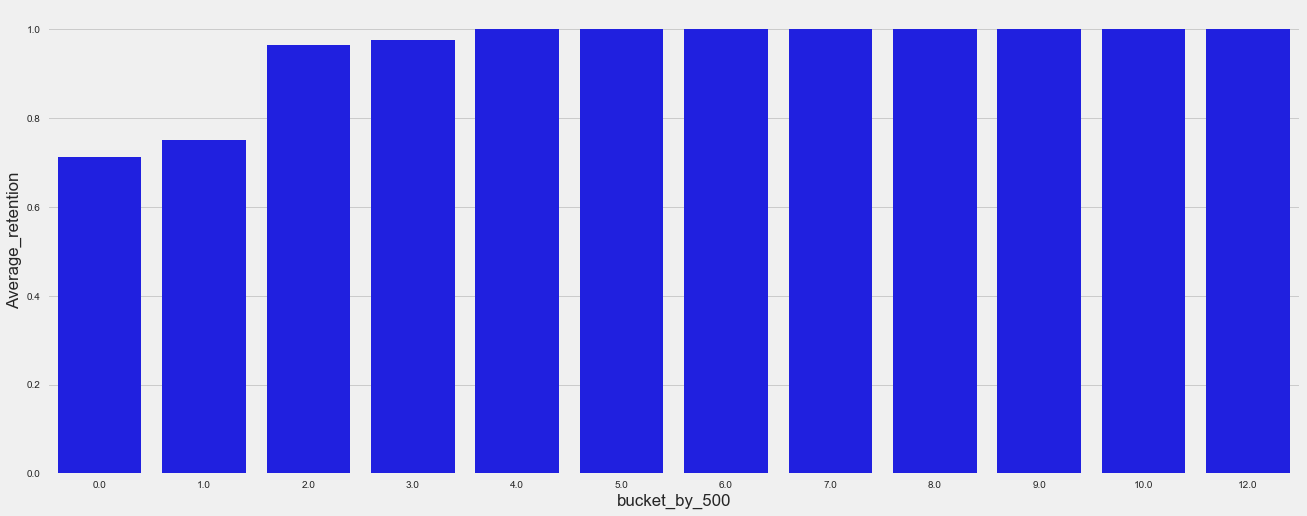

In [198]:
plt.figure(figsize=(20,8))
sns.barplot(x='bucket_by_500',y='Average_retention',data=churn_per_revenue_bucket,color='blue')
#plt.savefig('retention.png')

In [199]:
drivers_revenue_per_period.to_pickle('/Users/zoezhou/Documents/churn_df.pickle')

In [200]:
drivers_revenue_per_period.head(30)

,driver_id,#_rides,#_active_days,first_28_days_revenue_$,%_prime_time,second_28_days_revenue_$,Churn_2nd_period,retention,bucket_by_500
0,002be0ffdc997bd5c50703158b7c2491,109,21,1312.907194,0.376147,613.963974,0,1,2.0
1,007f0389f9c7b03ef97098422f902e62,7,3,87.102761,0.428571,152.819293,0,1,0.0
2,011e5c5dfc5c2c92501b8b24d47509bc,12,5,170.542045,0.416667,268.260552,0,1,0.0
3,0152a2f305e71d26cc964f8d4411add9,56,15,743.278028,0.214286,1331.836383,0,1,1.0
4,01674381af7edd264113d4e6ed55ecda,176,20,2494.205956,0.261364,2784.087152,0,1,4.0
5,0213f8b59219e32142711992ca4ec01f,203,22,2516.720877,0.241379,441.628027,0,1,5.0
6,0258e250ca195cc6258cbdc75aecd853,110,18,1527.668793,0.300000,2257.075312,0,1,3.0
7,02e440f6c209206375833cef02e0cbae,47,11,641.259187,0.212766,149.797530,0,1,1.0
8,036f3d94e7c65e4e3574822d31c72656,53,21,745.005119,0.113208,1117.309922,0,1,1.0
9,039c5afbca8e03e4c18d9c8ea94140ac,29,17,318.130982,0.275862,138.357121,0,1,0.0


# Drivers Value

## first 28 days

In [201]:
drivers_value_first_28_period = rides_first_28_period.groupby('driver_id', as_index=False).agg({
                                            'ride_id': lambda x: x.count(),
                                            'driver_onboard_date': lambda x: pd.to_datetime(x.iloc[0]),
                                            'timestamp': lambda x: pd.to_datetime(x.max()),
                                            'total_revenue_$': {'first_28_days_revenue_$':lambda x: x.sum(),'revenue_prime_time':lambda x: x[rides_first_28_period['ride_prime_time']>0].sum(),'revenue_no_prime_time':lambda x: x[rides_first_28_period['ride_prime_time']==0].sum()},
                                            'ride_distance_miles': lambda x: x.sum(),
                                            'ride_duration': lambda x: x.sum(),
                                            'ride_prime_time': lambda x: x[x>0].count().astype(float)/x.count(),
                                            'timestamp': lambda x: x.str.slice(start=0,stop=10).nunique(),
                                            #'total_revenue_$': lambda x: x[rides_first_28_period['ride_prime_time']>0].sum()
                                            }).rename(columns={
                                                                'ride_id': '#_rides',
                                                                'timestamp': 'last_date',
                                                                'ride_distance_miles': 'total_distance_miles',
                                                                'ride_duration':'total_duration_seconds',
                                                                #'total_revenue_$':'first_28_days_revenue_$',
                                                                'timestamp': '#_active_days',
                                                                'ride_prime_time': '%_prime_time',
                                                                #'total_revenue_$': ['first_28_days_revenue_$', 'revenue_prime_time','revenue_no_prime_time']
                                                })
drivers_value_first_28_period.head()


driver_id  #_rides driver_onboard_date  \
                                    <lambda>            <lambda>   
0  002be0ffdc997bd5c50703158b7c2491      109          2016-03-29   
1  007f0389f9c7b03ef97098422f902e62        7          2016-03-29   
2  011e5c5dfc5c2c92501b8b24d47509bc       12          2016-04-05   
3  0152a2f305e71d26cc964f8d4411add9       56          2016-04-23   
4  01674381af7edd264113d4e6ed55ecda      176          2016-04-29   

  #_active_days         total_revenue_$                     \
       <lambda> first_28_days_revenue_$ revenue_prime_time   
0            21             1312.907194         582.286988   
1             3               87.102761          50.744614   
2             5              170.542045          80.358454   
3            15              743.278028         203.510823   
4            20             2494.205956         709.985233   

                        total_distance_miles total_duration_seconds  \
  revenue_no_prime_time             <lambda>               <lambda>   
0            730.620206           386.305108                78271.0   
1             36.358147            18.624974                 5471.0   
2             90.183591            58.779211                 9929.0   
3            539.767206           264.131763                46599.0   
4           1784.220724           878.087322               165773.0   

  %_prime_time  
      <lambda>  
0     0.376147  
1     0.428571  
2     0.416667  
3     0.214286  
4     0.261364

In [202]:
first_period_drivers_value = drivers_value_first_28_period['total_revenue_$'] 
first_period_drivers_value['driver_id'] = drivers_value_first_28_period['driver_id']


In [203]:
# Lyft commision on each ride is 25%
# If prime time, the value of a driver should increase -> 70% of 25%
# If no prime time, the value of a driver should increase -> 50% of 25%

first_period_drivers_value['Driver_value_if_prime_time_first_period'] =  0.7 * (first_period_drivers_value['revenue_prime_time']*0.25)
first_period_drivers_value['Driver_value_if_no_prime_time_first_period'] =  0.5 * (first_period_drivers_value['revenue_no_prime_time']*0.25)
first_period_drivers_value['Total_Driver_value_first_period'] =  first_period_drivers_value['Driver_value_if_no_prime_time_first_period'] + first_period_drivers_value['Driver_value_if_prime_time_first_period']
first_period_drivers_value.head()

,first_28_days_revenue_$,revenue_prime_time,revenue_no_prime_time,driver_id,Driver_value_if_prime_time_first_period,Driver_value_if_no_prime_time_first_period,Total_Driver_value_first_period
0,1312.907194,582.286988,730.620206,002be0ffdc997bd5c50703158b7c2491,101.900223,91.327526,193.227749
1,87.102761,50.744614,36.358147,007f0389f9c7b03ef97098422f902e62,8.880307,4.544768,13.425076
2,170.542045,80.358454,90.183591,011e5c5dfc5c2c92501b8b24d47509bc,14.062729,11.272949,25.335678
3,743.278028,203.510823,539.767206,0152a2f305e71d26cc964f8d4411add9,35.614394,67.470901,103.085295
4,2494.205956,709.985233,1784.220724,01674381af7edd264113d4e6ed55ecda,124.247416,223.027590,347.275006


## Second 28 days

In [204]:
#second 28 day period

drivers_value_second_28_period = rides_second_28_period.groupby('driver_id', as_index=False).agg({
                                            'ride_id': lambda x: x.count(),
                                            'driver_onboard_date': lambda x: pd.to_datetime(x.iloc[0]),
                                            'timestamp': lambda x: pd.to_datetime(x.max()),
                                            'total_revenue_$': {'second_28_days_revenue_$':lambda x: x.sum(),'revenue_prime_time':lambda x: x[rides_second_28_period['ride_prime_time']>0].sum(),'revenue_no_prime_time':lambda x: x[rides_second_28_period['ride_prime_time']==0].sum()},
                                            'ride_distance_miles': lambda x: x.sum(),
                                            'ride_duration': lambda x: x.sum(),
                                            'ride_prime_time': lambda x: x[x>0].count().astype(float)/x.count(),
                                            'timestamp': lambda x: x.str.slice(start=0,stop=10).nunique(),
                                            #'total_revenue_$': lambda x: x[rides_first_28_period['ride_prime_time']>0].sum()
                                            }).rename(columns={
                                                                'ride_id': '#_rides',
                                                                'timestamp': 'last_date',
                                                                'ride_distance_miles': 'total_distance_miles',
                                                                'ride_duration':'total_duration_seconds',
                                                                #'total_revenue_$':'first_28_days_revenue_$',
                                                                'timestamp': '#_active_days',
                                                                'ride_prime_time': '%_prime_time',
                                                                #'total_revenue_$': ['first_28_days_revenue_$', 'revenue_prime_time','revenue_no_prime_time']
                                                })
drivers_value_second_28_period.head()

driver_id  #_rides driver_onboard_date  \
                                    <lambda>            <lambda>   
0  002be0ffdc997bd5c50703158b7c2491       42          2016-03-29   
1  007f0389f9c7b03ef97098422f902e62       15          2016-03-29   
2  011e5c5dfc5c2c92501b8b24d47509bc       17          2016-04-05   
3  0152a2f305e71d26cc964f8d4411add9       93          2016-04-23   
4  01674381af7edd264113d4e6ed55ecda      190          2016-04-29   

  #_active_days          total_revenue_$                     \
       <lambda> second_28_days_revenue_$ revenue_prime_time   
0            11               613.963974         428.923974   
1             5               152.819293          57.499176   
2             6               268.260552         123.910647   
3            19              1331.836383         430.404322   
4            19              2784.087152         796.331660   

                        total_distance_miles total_duration_seconds  \
  revenue_no_prime_time             <lambda>               <lambda>   
0            185.040000           166.278880                34449.0   
1             95.320117            39.226530                10049.0   
2            144.349906            94.615541                16457.0   
3            901.432061           465.414957                90484.0   
4           1987.755492          1015.189105               182815.0   

  %_prime_time  
      <lambda>  
0     0.523810  
1     0.333333  
2     0.529412  
3     0.279570  
4     0.247368

In [205]:
second_period_drivers_value = drivers_value_second_28_period['total_revenue_$'] 
second_period_drivers_value['driver_id'] = drivers_value_second_28_period['driver_id']

In [206]:
# Lyft commision on each ride is 25%
# If prime time, the value of a driver should increase -> 70% of 25%
# If no prime time, the value of a driver should increase -> 50% of 25%

second_period_drivers_value['Driver_value_if_prime_time_second_period'] =  0.7 * (second_period_drivers_value['revenue_prime_time']*0.25)
second_period_drivers_value['Driver_value_if_no_prime_time_second_period'] =  0.5 * (second_period_drivers_value['revenue_no_prime_time']*0.25)
second_period_drivers_value['Total_Driver_value_second_period'] =  second_period_drivers_value['Driver_value_if_no_prime_time_second_period'] + second_period_drivers_value['Driver_value_if_prime_time_second_period']
second_period_drivers_value.head()

,second_28_days_revenue_$,revenue_prime_time,revenue_no_prime_time,driver_id,Driver_value_if_prime_time_second_period,Driver_value_if_no_prime_time_second_period,Total_Driver_value_second_period
0,613.963974,428.923974,185.040000,002be0ffdc997bd5c50703158b7c2491,75.061695,23.130000,98.191695
1,152.819293,57.499176,95.320117,007f0389f9c7b03ef97098422f902e62,10.062356,11.915015,21.977370
2,268.260552,123.910647,144.349906,011e5c5dfc5c2c92501b8b24d47509bc,21.684363,18.043738,39.728101
3,1331.836383,430.404322,901.432061,0152a2f305e71d26cc964f8d4411add9,75.320756,112.679008,187.999764
4,2784.087152,796.331660,1987.755492,01674381af7edd264113d4e6ed55ecda,139.358040,248.469437,387.827477


In [207]:
# There are drivers who didn't complete any rides during the second 28 days period

total_value_per_driver= pd.merge(first_period_drivers_value.iloc[:,[3,6]],second_period_drivers_value.iloc[:,[3,6]],how='outer',on='driver_id')
total_value_per_driver['Total_Driver_value_second_period'].fillna(0,inplace=True)
total_value_per_driver.head(10)

,driver_id,Total_Driver_value_first_period,Total_Driver_value_second_period
0,002be0ffdc997bd5c50703158b7c2491,193.227749,98.191695
1,007f0389f9c7b03ef97098422f902e62,13.425076,21.977370
2,011e5c5dfc5c2c92501b8b24d47509bc,25.335678,39.728101
3,0152a2f305e71d26cc964f8d4411add9,103.085295,187.999764
4,01674381af7edd264113d4e6ed55ecda,347.275006,387.827477
5,0213f8b59219e32142711992ca4ec01f,354.747175,63.324945
6,0258e250ca195cc6258cbdc75aecd853,217.274932,321.647758
7,02e440f6c209206375833cef02e0cbae,89.643502,20.736770
8,036f3d94e7c65e4e3574822d31c72656,98.207703,154.941765
9,039c5afbca8e03e4c18d9c8ea94140ac,45.901925,17.294640


In [208]:
total_value_per_driver['Average_value']=(total_value_per_driver['Total_Driver_value_first_period']+total_value_per_driver['Total_Driver_value_second_period'])/2

In [209]:
total_value_per_driver.head()

,driver_id,Total_Driver_value_first_period,Total_Driver_value_second_period,Average_value
0,002be0ffdc997bd5c50703158b7c2491,193.227749,98.191695,145.709722
1,007f0389f9c7b03ef97098422f902e62,13.425076,21.977370,17.701223
2,011e5c5dfc5c2c92501b8b24d47509bc,25.335678,39.728101,32.531890
3,0152a2f305e71d26cc964f8d4411add9,103.085295,187.999764,145.542529
4,01674381af7edd264113d4e6ed55ecda,347.275006,387.827477,367.551242


In [210]:
total_value_per_driver['Average_value'].describe()

count    646.000000
mean     173.773234
std      142.538999
min        0.713571
25%       41.113086
50%      153.618596
75%      269.146842
max      866.220860
Name: Average_value, dtype: float64

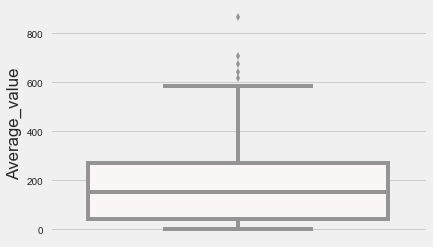

In [211]:
#boxplot for average value per driver
sns.boxplot(y=total_value_per_driver['Average_value'], palette="vlag")
sns.set_context('paper')
sns.set_style("whitegrid")
sns.despine(bottom=False)
plt.show()

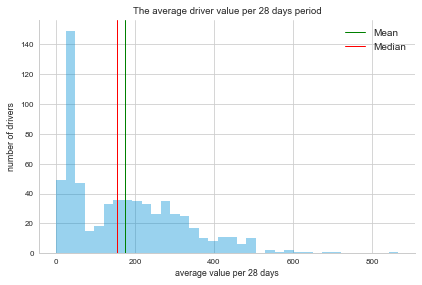

In [212]:
ax = sns.distplot(total_value_per_driver['Average_value'],bins=36, hist=True, kde=False)
ax.set_title('The average driver value per 28 days period')
sns.set_context('poster')
sns.set(style='whitegrid')
sns.despine(bottom=False)
ax.set_ylabel('number of drivers')
ax.set_xlabel('average value per 28 days')
ax.axvline(total_value_per_driver['Average_value'].mean(), color = 'green', linewidth = 1)
ax.axvline(total_value_per_driver['Average_value'].median(), color = 'red', linewidth = 1)
ax.legend(['Mean', 'Median'])
plt.savefig("average_driver_value.png")
plt.show()

In [213]:
plt.savefig('Average driver value per 28 days perdiod.png')

<Figure size 432x288 with 0 Axes>

In [214]:
total_value_per_driver.to_pickle('/Users/zoezhou/Documents/total_value_per_driver.pickle')

# ---------------------------------------------------------------

# Part 4 - Modelling



### Crucial point:It follows a geometric distribution. The expected value of represent the average lifetime of a driver

### E(X)=1/probability_of_churn

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc,recall_score,precision_score
from sklearn.preprocessing import StandardScaler
from sklearn import feature_selection
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression

import pylab 
pylab.rcParams['figure.figsize'] = 12, 8

% matplotlib inline

## Load the data

Highlight - the dataset is imbalanced

In [216]:
total_value = pd.read_pickle('/Users/zoezhou/Documents/total_value_per_driver.pickle')

In [217]:
total_value.head()

,driver_id,Total_Driver_value_first_period,Total_Driver_value_second_period,Average_value
0,002be0ffdc997bd5c50703158b7c2491,193.227749,98.191695,145.709722
1,007f0389f9c7b03ef97098422f902e62,13.425076,21.977370,17.701223
2,011e5c5dfc5c2c92501b8b24d47509bc,25.335678,39.728101,32.531890
3,0152a2f305e71d26cc964f8d4411add9,103.085295,187.999764,145.542529
4,01674381af7edd264113d4e6ed55ecda,347.275006,387.827477,367.551242


In [218]:
churn_df = pd.read_pickle('/Users/zoezhou/Documents/churn_df.pickle')

In [219]:
churn_df.head()

,driver_id,#_rides,#_active_days,first_28_days_revenue_$,%_prime_time,second_28_days_revenue_$,Churn_2nd_period,retention,bucket_by_500
0,002be0ffdc997bd5c50703158b7c2491,109,21,1312.907194,0.376147,613.963974,0,1,2.0
1,007f0389f9c7b03ef97098422f902e62,7,3,87.102761,0.428571,152.819293,0,1,0.0
2,011e5c5dfc5c2c92501b8b24d47509bc,12,5,170.542045,0.416667,268.260552,0,1,0.0
3,0152a2f305e71d26cc964f8d4411add9,56,15,743.278028,0.214286,1331.836383,0,1,1.0
4,01674381af7edd264113d4e6ed55ecda,176,20,2494.205956,0.261364,2784.087152,0,1,4.0


In [220]:
churn_df['Churn_2nd_period'].value_counts()

0    552
1     94
Name: Churn_2nd_period, dtype: int64

14.5% of the total drivers churned second 28 days period.

In [221]:
churn_df.head()

,driver_id,#_rides,#_active_days,first_28_days_revenue_$,%_prime_time,second_28_days_revenue_$,Churn_2nd_period,retention,bucket_by_500
0,002be0ffdc997bd5c50703158b7c2491,109,21,1312.907194,0.376147,613.963974,0,1,2.0
1,007f0389f9c7b03ef97098422f902e62,7,3,87.102761,0.428571,152.819293,0,1,0.0
2,011e5c5dfc5c2c92501b8b24d47509bc,12,5,170.542045,0.416667,268.260552,0,1,0.0
3,0152a2f305e71d26cc964f8d4411add9,56,15,743.278028,0.214286,1331.836383,0,1,1.0
4,01674381af7edd264113d4e6ed55ecda,176,20,2494.205956,0.261364,2784.087152,0,1,4.0



### The features to predict driver's churn are:
- Number of rides
- The total ride price per driver
- The number of active days (at least one ride)
- The percentage of rides with prime time

In [222]:
X_all = churn_df[[col for col in churn_df.columns if col in ['#_rides','first_28_days_revenue_$','#_active_days','%_prime_time']]]
target = churn_df['Churn_2nd_period']

In [223]:
X_all.shape

(646, 4)

In [224]:
X_all

,#_rides,#_active_days,first_28_days_revenue_$,%_prime_time
0,109,21,1312.907194,0.376147
1,7,3,87.102761,0.428571
2,12,5,170.542045,0.416667
3,56,15,743.278028,0.214286
4,176,20,2494.205956,0.261364
5,203,22,2516.720877,0.241379
6,110,18,1527.668793,0.300000
7,47,11,641.259187,0.212766
8,53,21,745.005119,0.113208
9,29,17,318.130982,0.275862


#  Split data

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X_all,target,test_size=0.3)

In [226]:
X_train.shape

(452, 4)

###  model #1 - Logistic regression

In [227]:
lr = LogisticRegression()

In [228]:
#fit the model
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [229]:
print(lr.coef_)

[[ 0.01134125 -0.16528373 -0.00125279 -0.08206313]]


In [230]:
lr.score(X_train,y_train)

0.8473451327433629

In [231]:
Y_train_pred = lr.predict(X_train)
Y_test_pred = lr.predict(X_test)

In [232]:
#Train
print(classification_report(y_train, Y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       386
           1       0.38      0.08      0.13        66

   micro avg       0.85      0.85      0.85       452
   macro avg       0.62      0.53      0.52       452
weighted avg       0.79      0.85      0.80       452



In [233]:
#Test
print(classification_report(y_test, Y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       166
           1       0.00      0.00      0.00        28

   micro avg       0.85      0.85      0.85       194
   macro avg       0.43      0.49      0.46       194
weighted avg       0.73      0.85      0.78       194



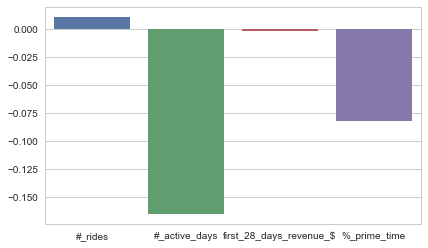

In [234]:
sns.barplot(x=X_train.columns,y=lr.coef_[0]) 
plt.show()

In [235]:
# The expected lifetime is equal to 1/probabaility_of_churn 

lifetime_28_days_period = ([1/x[1] for x in lr.predict_proba(X_all)])

In [236]:
X_all['Driver_Lifetime']= lifetime_28_days_period

In [237]:
X_all['driver_id']= churn_df['driver_id']

In [238]:
X_all

,#_rides,#_active_days,first_28_days_revenue_$,%_prime_time,Driver_Lifetime,driver_id
0,109,21,1312.907194,0.376147,31.780404,002be0ffdc997bd5c50703158b7c2491
1,7,3,87.102761,0.428571,2.080258,007f0389f9c7b03ef97098422f902e62
2,12,5,170.542045,0.416667,2.575569,011e5c5dfc5c2c92501b8b24d47509bc
3,56,15,743.278028,0.214286,11.067888,0152a2f305e71d26cc964f8d4411add9
4,176,20,2494.205956,0.261364,54.103127,01674381af7edd264113d4e6ed55ecda
5,203,22,2516.720877,0.241379,56.877186,0213f8b59219e32142711992ca4ec01f
6,110,18,1527.668793,0.300000,25.106682,0258e250ca195cc6258cbdc75aecd853
7,47,11,641.259187,0.212766,6.064999,02e440f6c209206375833cef02e0cbae
8,53,21,745.005119,0.113208,28.908911,036f3d94e7c65e4e3574822d31c72656
9,29,17,318.130982,0.275862,12.229716,039c5afbca8e03e4c18d9c8ea94140ac


In [239]:
value_per_driver = pd.read_pickle('/Users/zoezhou/Documents/total_value_per_driver.pickle')

In [240]:
driver_lifetime_value = pd.merge(X_all,value_per_driver,how='inner',on='driver_id')

In [241]:
#driver ltv=driver life time * average valueAve
driver_lifetime_value['Driver_lifetime_value'] = driver_lifetime_value['Driver_Lifetime'] * driver_lifetime_value['Average_value']

In [242]:
driver_lifetime_value.head()

,#_rides,#_active_days,first_28_days_revenue_$,%_prime_time,Driver_Lifetime,driver_id,Total_Driver_value_first_period,Total_Driver_value_second_period,Average_value,Driver_lifetime_value
0,109,21,1312.907194,0.376147,31.780404,002be0ffdc997bd5c50703158b7c2491,193.227749,98.191695,145.709722,4630.713869
1,7,3,87.102761,0.428571,2.080258,007f0389f9c7b03ef97098422f902e62,13.425076,21.977370,17.701223,36.823106
2,12,5,170.542045,0.416667,2.575569,011e5c5dfc5c2c92501b8b24d47509bc,25.335678,39.728101,32.531890,83.788113
3,56,15,743.278028,0.214286,11.067888,0152a2f305e71d26cc964f8d4411add9,103.085295,187.999764,145.542529,1610.848479
4,176,20,2494.205956,0.261364,54.103127,01674381af7edd264113d4e6ed55ecda,347.275006,387.827477,367.551242,19885.671344


Boxplot of driver lifetime value

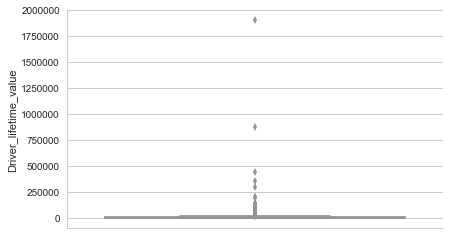

In [243]:

sns.boxplot(y=driver_lifetime_value['Driver_lifetime_value'], palette="vlag")
sns.set_context('paper')
sns.set_style("darkgrid")
sns.despine(bottom=False)
plt.show()

In [244]:
driver_lifetime_value['Driver_lifetime_value'].describe()

count    6.460000e+02
mean     1.664964e+04
std      8.866205e+04
min      1.276384e+00
25%      1.745443e+02
50%      1.823200e+03
75%      8.903690e+03
max      1.901254e+06
Name: Driver_lifetime_value, dtype: float64

There are outliers in driver_lifetime_value, so we should remove the outliers.

Upper_limit=Q3+1.5*IQR=5687+1.5*5575=5687+8362.5=14049.5

In [245]:
driver_lifetime_value_new = driver_lifetime_value[driver_lifetime_value.Driver_lifetime_value < 14049.5]

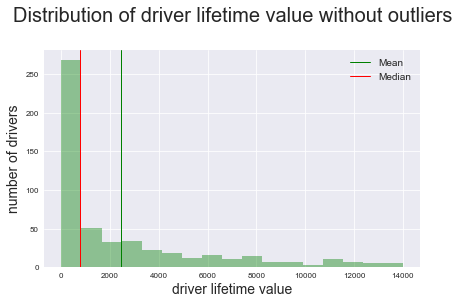

In [246]:
ax = sns.distplot(driver_lifetime_value_new['Driver_lifetime_value'], hist=True, kde=False,color="green")
ax.set_title('Distribution of driver lifetime value without outliers\n', size = 20)
sns.set_context('poster')
sns.set(style='darkgrid')
sns.despine(bottom=False)
ax.set_ylabel('number of drivers', size = 14)
ax.set_xlabel('driver lifetime value', size = 14)
ax.axvline(driver_lifetime_value_new['Driver_lifetime_value'].mean(), color = 'green', linewidth = 1)
ax.axvline(driver_lifetime_value_new['Driver_lifetime_value'].median(), color = 'red', linewidth = 1)
ax.legend(['Mean', 'Median'])
plt.show()

In [247]:
driver_lifetime_value_new['Driver_lifetime_value'].describe()

count      524.000000
mean      2465.414940
std       3375.828081
min          1.276384
25%        130.360499
50%        771.022770
75%       3549.842133
max      14017.938155
Name: Driver_lifetime_value, dtype: float64

The driver lifetime value after removing the outliers has mean of 1972 and median of 529.

# ------------------------------------------------------------------------

## Random Forest Classifier is used to get the importance of each feature


In [248]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [249]:
def significance(cols):
    if cols['p-value']<0.001:
        return '***'
    if cols['p-value']<0.01:
        return '**'
    if cols['p-value']<0.1:
        return '*'
    else:
        return ''

In [250]:
c=feature_selection.f_classif(X_train,y_train)[1].tolist()
summary=pd.concat([pd.DataFrame(data=np.transpose(abs(rfc.feature_importances_)),index=X_all.iloc[:,:4].columns,
                                columns=['Coef']), pd.DataFrame(c,index=X_all.iloc[:,:4].columns,columns=['p-value'])], axis=1)
summary['significance']=pd.DataFrame(summary.apply(significance,axis=1))
    
df_relevant_feature_rfc = summary.sort_values(by='p-value',ascending=True)
df_relevant_feature_rfc

,Coef,p-value,significance
#_active_days,0.182419,2.785359e-17,***
first_28_days_revenue_$,0.289725,9.057031e-11,***
#_rides,0.353554,1.663170e-10,***
%_prime_time,0.174302,3.644326e-02,*


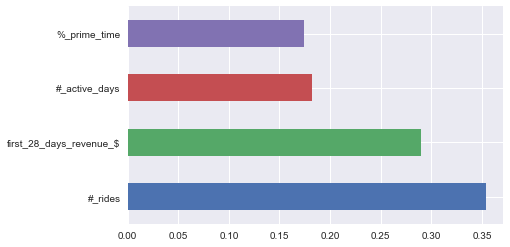

In [251]:
import matplotlib.pyplot as plt
%matplotlib inline

feature_importances = pd.Series(rfc.feature_importances_, index = X_train.columns)
feature_importances.nlargest(4).plot(kind='barh')

Thanks for reading